# HW 20-21

# Imports

In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

# HW 20

In [2]:
# In some situations, the reliability of a measurement is known to vary. For example, one could
# imagine a situation where the measurement mechanism goes through a “warm up” period, lead-
# ing to less reliable measurements early in the measurement period but becoming more reliable
# in time. Statisticians call data with varying reliability heteroscedastic.

# In the file heteroscedastic.txt, are 20 data points, (ti,yi), i= 1,...,20. Presumably these are
# samples from a “true data function” that maps R →R.

data: np.ndarray = pd.read_csv("heteroscedastic.txt", delimiter=" ", header=None).values.astype(np.float64)
t_i = data[:, 0]
y_i = data[:, 1]

(-1.6026, 27.4786)

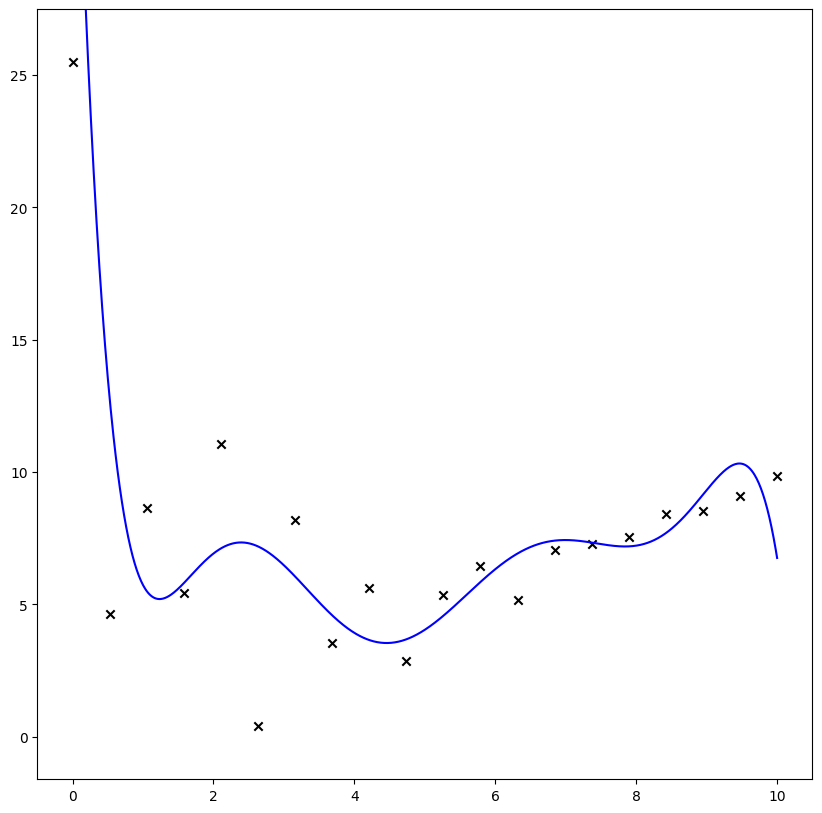

In [3]:
# a. Choose a reasonable basis for this problem and construct the system matrix

# to choose a basis, let's plot the data
plt.figure(figsize=(10, 10))
plt.scatter(t_i, y_i, marker="x", color="black")

# I first tried sinusoids, and then Zulip directed me to Legendre

# our design matrix is created as follows:
def adjust_vec(vec):
    """ move all values in a vector such that 3 standard deviations are between -1 and 1, but maintain their relative distances """
    m = np.mean(vec) # mean
    sd = np.std(vec) # standard deviation
    z = (vec-m)/sd # z-score (3 sd's are between -3, 3)
    tau = z/3 # 3 sd's are within -1, 1
    return tau
def design_mat(k: int, vec) -> np.ndarray:
    """ copied from HW 16 """
    tau = adjust_vec(vec)
    A = np.stack([np.polynomial.legendre.Legendre.basis(i)(tau) for i in range(k)]).T
    return A

# validate that it's a good bais (adapted from HW 19)
x_for_plotting = np.linspace(np.min(t_i), np.max(t_i), 1000)

columns=8
A = design_mat(columns, t_i)
theta_hat, sse, rank, s = np.linalg.lstsq(A, y_i)
A_plotting = design_mat(columns, x_for_plotting)
y_for_plotting = A_plotting@theta_hat
plt.plot(x_for_plotting, y_for_plotting, color = "blue")
plt.ylim(np.min(y_i)-2, np.max(y_i)+2)


In [4]:
# b. Find the parameters characterizing the best-fit line in a least-squares sense.

# I found those above in (A)
theta_hat


array([  180.99269084, -1184.82321891,   626.73651619, -1690.14773509,
         488.91282054, -1006.35571856,   150.15205484,  -252.13105817])

In [5]:
np.exp(0)

np.float64(1.0)

In [6]:
# c. Now suppose that you know, a priori that doubt about the reliability, or the uncertainty, in
# your data follows the function σ(t) = 20e−t/2. Construct a diagonal 20 ×20 weighting matrix
# S with entries 1/σ2 corresponding to the timestamp for each point in your dataset.

def true_fun(t):
    return 20*np.exp(-t/2)

def tim_stps(t):
    return 1/(true_fun(t)**2)

sig_t = tim_stps(t_i)
S = np.diag(sig_t)

pd.DataFrame(S)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0025,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0000,0.004232,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0000,0.000000,0.007163,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0000,0.000000,0.000000,0.012124,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0000,0.000000,0.000000,0.000000,0.020524,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0000,0.000000,0.000000,0.000000,0.000000,0.03474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.058803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.099533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.168476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.285171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


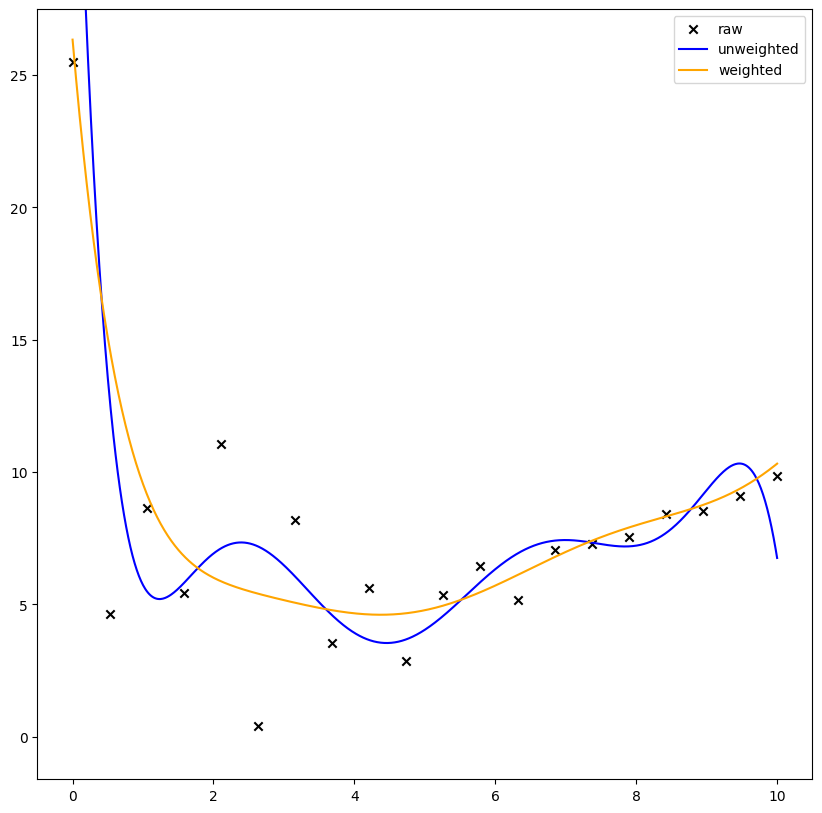

In [7]:
# d. Use the above matrix S to solve a weighted least squares problem (y_hat = SAθ) and report the
# parameters characterizing it’s best-fit line. Plot both the least squares and weighted least
# squares lines on a plot with the data so you can compare the fits.

# Dr. Hart corrected: we're solving with θ2 = inv(A'*S*A)*A'*S*y

# Adapting from (A)
plt.figure(figsize=(10, 10))
plt.scatter(t_i, y_i, marker="x", color="black", label="raw")

x_for_plotting = np.linspace(np.min(t_i), np.max(t_i), 1000)

A = design_mat(columns, t_i)
theta_hat, sse, rank, s = np.linalg.lstsq(A, y_i)
y_for_plotting = A_plotting@theta_hat
plt.plot(x_for_plotting, y_for_plotting, color = "blue", label="unweighted")

theta_hat, sse, rank, s = np.linalg.lstsq(S@A, S@y_i)
theta_hat = np.linalg.pinv(A.T@S@A)@A.T@S@y_i
y_for_plotting = A_plotting@theta_hat
plt.plot(x_for_plotting, y_for_plotting, color = "orange", label="weighted")
plt.ylim(np.min(y_i)-2, np.max(y_i)+2)
plt.legend()

In [8]:
# e. Write a short summary of your observations, particularly considering how S may relate to
# Fisher information. If you didn’t have a priori knowledge about the reliability of your data,
# what could you do (if anything) to estimate it from the data itself? When would your scheme
# work well? When would it fail?

# my observation is that when we add weighting, we get better results. This makes sense, given that we had a good prior.
# I don't quite understand why we used 1/σ^2 and a diagonal for timestamps, but I understand that fisher information 
# strategies attempt to quantify things about parameters based information about the random variable. That is what we did
# here: we quantified the value of each point for our model based on the time it was taken. So based on that reasoning,
# if we didn't have a priori knowledge about the reliability of our data, we might get data out of considering the hessian,
# or we could implement some regularization strategy that constrains the size of the model to keep it from overfitting.
# in that latter case, the scheme is not quite modeling uncertainty, but it would work well if there's more data, and fail
# when it uses the wrong basis or otherwise does not consider information about the underlying distribution

# HW 21

<img src="formula.png" alt="formula" width="500">

In [9]:
# Consider the least squares error function above
# where ti are 20 evenly spaced between 0 and 1 and f(t) = t2

t_i = np.linspace(0, 1, 20)

def C(theta_one, theta_two, t):
    return 0.5 * (np.linalg.norm(t*t-theta_one*t-theta_two*(t*t), ord=2)**2)

Text(0.5, 1.0, 'Contours')

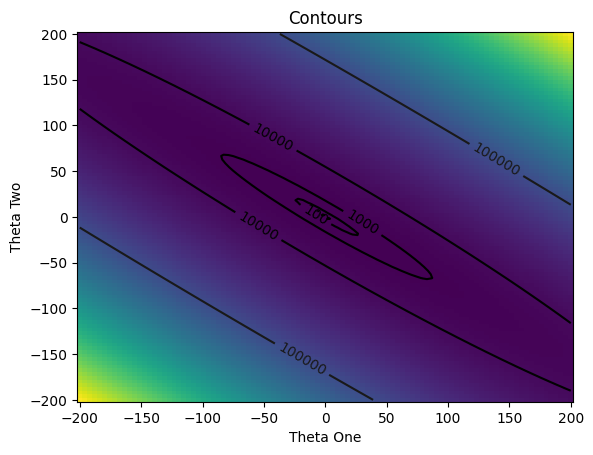

In [10]:
# a. Make a contour plot of C with θ1 on the x-axis and θ2 on the y axis.

theta_one_smooth = np.linspace(-200, 200, 100)
theta_two_smooth = np.linspace(-200, 200, 100)
contour_values = np.array([
    [
        C(thet_1, thet_2, t_i) for thet_2 in theta_two_smooth
    ] for thet_1 in theta_one_smooth
])

plt.pcolormesh(theta_two_smooth, theta_two_smooth, contour_values)
cont_set = plt.contour(theta_two_smooth, theta_two_smooth, contour_values, levels = [10**i for i in range(0, 7)], cmap="grey")
plt.clabel(cont_set)
plt.xlabel("Theta One")
plt.ylabel("Theta Two")
plt.title("Contours")

In [11]:
# b. Find the Fisher Information Matrix (FIM) for this model and calculate its eigenvalues and
# eigenvectors. Graphically confirm that the ellipses in your contour plot are oriented with its
# eigenvectors and the aspect ratio is given by the ratio of the square root of the eigenvalues.






def adjust_vec(vec):
    """ move all values in a vector such that 3 standard deviations are between -1 and 1, but maintain their relative distances """
    m = np.mean(vec) # mean
    sd = np.std(vec) # standard deviation
    z = (vec-m)/sd # z-score (3 sd's are between -3, 3)
    tau = z/3 # 3 sd's are within -1, 1
    return tau
def design_mat(k: int, vec) -> np.ndarray:
    """ copied from HW 16 """
    tau = adjust_vec(vec)
    A = np.stack([np.polynomial.legendre.Legendre.basis(i)(tau) for i in range(k)]).T
    return A

# validate that it's a good bais (adapted from HW 19)
x_for_plotting = np.linspace(np.min(t_i), np.max(t_i), 1000)

columns=8
A = design_mat(columns, t_i)
theta_hat, sse, rank, s = np.linalg.lstsq(A, y_i)
A_plotting = design_mat(columns, x_for_plotting)



In [12]:
# c. Generate data according to yi = f(ti) + ϵi where ϵ is Gaussian noise with zero mean and
# standard deviation 0.1. Use Ordinary Least Squares (OLS) regression , fit your data to the
# model θ1t+ θ2t^2


In [13]:
# d. Repeat your OLS fit 1000 times for different realizations of your data and plot your estimates
# as a scatter plot on top of your contour plot.


In [14]:
# e. What does this problem show you about the FIM? Note that there is no ”right” way to
# answer this question.


# Chat

In [15]:
raise NotImplementedError("need ChatGPT")

NotImplementedError: need ChatGPT

# Acknowledgment
Work in this repository and with associated assignments and projects may be adapted or copied from similar files used in my prior academic and industry work (e.g., using a LaTeX file or Dockerfile as a starting point). Those files and any other work in this repository may have been developed with the help of LLM's like ChatGPT. For example, to provide context, answer questions, refine writing, understand function call syntax, and assist with repetitive tasks. In these cases, deliverables and associated work reflect my best efforts to optimize my learning and demonstrate my capacity, while using available resources and LLM's to facilitate the process.


[ChatGPT Conversation](https://chatgpt.com)